# OpenThread energy analysis

In [34]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils import *

def get_stats(df):
    duration = df.index[-1] - df.index[0]
    mean_current = df.Current.mean()
    energy_spent = mean_current * duration
    return mean_current, duration, energy_spent

# Full Thread Device

In [50]:
data_set = "fed_rx.csv"
df = import_dlog(data_set)
df["Curr"] = 1000 * df["Curr"]

<IPython.core.display.Javascript object>


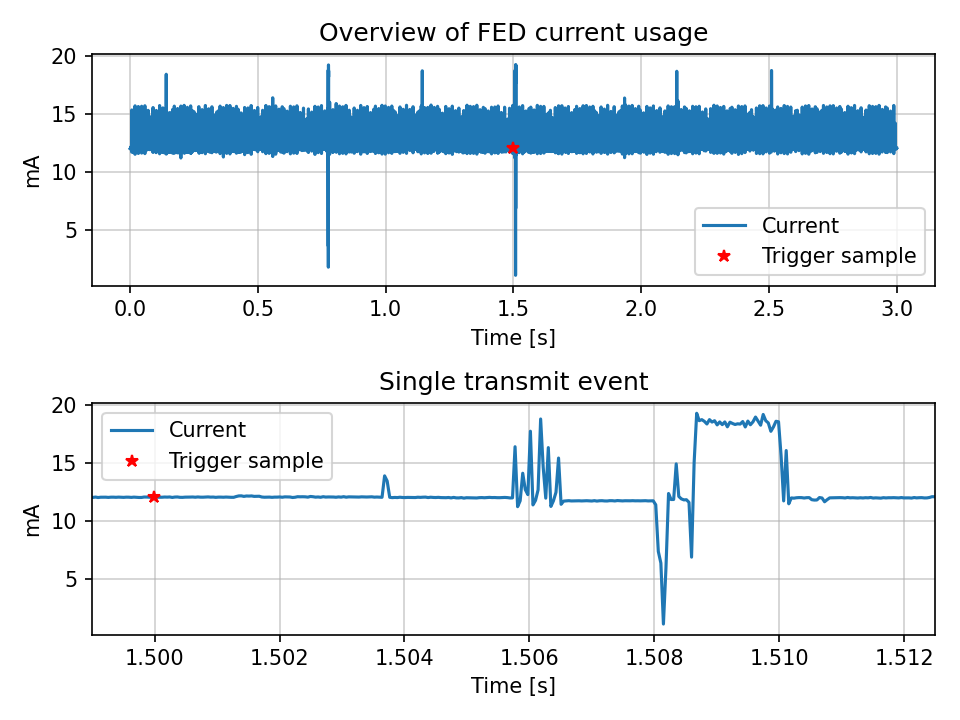

Mean current usage: 12.05475106919527 mA


In [51]:
trigger_sample = 503562 - 466941

fig, ax = plt.subplots(2,1, sharey=True)
fig.dpi = 150
df.plot(ax=ax[0], ylabel="mA", xlabel="Time [s]", title="Overview of FED current usage")
ax[0].plot(df.index[trigger_sample], df["Curr"].iloc[trigger_sample], '*r')
ax[0].legend(["Current", "Trigger sample"])
ax[0].grid(alpha=.6)

df.plot(ax=ax[1], xlim=(df.index[trigger_sample]-0.001, df.index[trigger_sample]+0.0125),  ylabel="mA", xlabel="Time [s]", title="Single transmit event")
ax[1].plot(df.index[trigger_sample], df["Curr"].iloc[trigger_sample], '*r')
ax[1].legend(["Current", "Trigger sample"])
ax[1].grid(alpha=0.6)
plt.tight_layout()
plt.show()

save_plot("ot_fed_current_usage.png")

print(f"Mean current usage: {df.Curr.mean()} mA")

## Minimal Thread Device

In [47]:
data_set = "ot_tx_sed.csv"
df = import_dlog(data_set)
df["Curr"] = 1000 * df["Curr"]

<IPython.core.display.Javascript object>


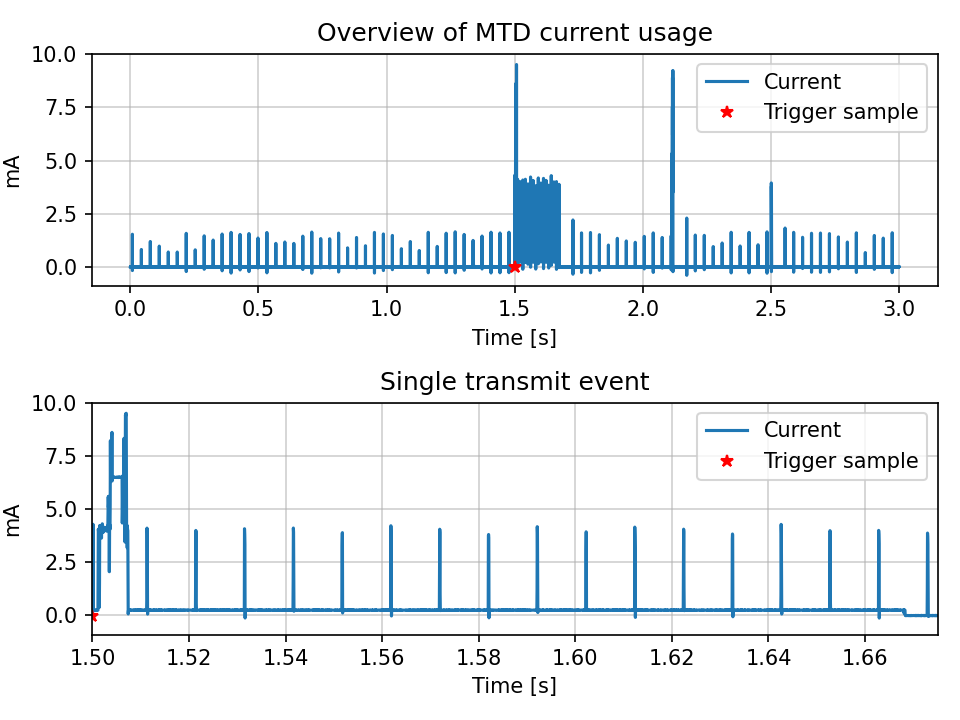

Mean current: 0.46162116519274854 mA, duration: 175.06303999999994 ms, energy spent 80.81280450698472 uC


In [48]:
trigger_sample = 91026 - 54405

fig, ax = plt.subplots(2,1, sharey=True)
fig.dpi = 150
df.plot(ax=ax[0], y="Curr", ylabel="mA", xlabel="Time [s]", title="Overview of MTD current usage")
ax[0].plot(df.index[trigger_sample], df["Curr"].iloc[trigger_sample], '*r')
ax[0].legend(["Current", "Trigger sample"])
ax[0].grid(alpha=.6)

transmit_event = df[df.index[trigger_sample]-0.0001:df.index[trigger_sample]+0.175]["Curr"]
mean_curr = transmit_event.mean()
event_duration = transmit_event.index[-1] - transmit_event.index[0]
energy_spent = mean_curr * event_duration
print(f"Mean current: {mean_curr} mA, duration: {event_duration * 1000} ms, energy spent {energy_spent * 1000} uC")

df.plot(ax=ax[1], y="Curr", title="Single transmit event", xlim=(df.index[trigger_sample]-0.0001, df.index[trigger_sample]+0.175),  ylabel="mA", xlabel="Time [s]")
ax[1].plot(df.index[trigger_sample], df["Curr"].iloc[trigger_sample], '*r')
ax[1].legend(["Current", "Trigger sample"])
ax[1].grid(alpha=0.6)
plt.tight_layout()
plt.show()

save_plot("ot_mtd_current_overview.png")